### Submission

#### Objective:
The objective of the document is to give a glimpse of the thought process, and possibly give a view on iterative implementation methodology, rather than a specific model or a alogrithm.

#### Ask

**Problem Statement**

There are three sheets attached to this assignment. 

news-data(X1) has unstructured data extracted from the internet. 

master-company-sheet(X2) has company information like name, _id.

output-sheet is having columns like blog_id, company_ids, title, description

**Objective**

We are interested in matching companies mentioned in the news articles(refer title, description) with the companies from the master-sheet. For all the matched articles, the output-sheet should be updated with the relevant information.

#### Interpretation of the Ask/Problem

1. Given title, description for company/ies in each blog- tag the blog to the companies from the pre-existing list of companies
2. Post Match - Enrich the table to include relevant information(title and description) from the news article as is.

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
news_data_raw_v1=pd.read_csv('news_data.csv')
'title',news_data_raw_v1.iloc[5]['_id']
'title',news_data_raw_v1.iloc[5]['title']
'description',news_data_raw_v1.iloc[5]['description']


('title', 6)

('title', 'Amazon Analysts Raise Price Targets After Stellar Q2 Results')

('description',
 'Consumers flocked to Amazon for shopping, as the coronavirus pandemic stranded them at home. And businesses increasingly used the cloud.')

In [7]:
op_v1=pd.DataFrame(
(news_data_raw_v1.iloc[5]['_id'],news_data_raw_v1.iloc[5]['title'],news_data_raw_v1.iloc[5]['description'],[36],['Amazon'])
).T
op_v1.columns=['blog_id','title','description', 'company_ids','company_names']
op_v1


,blog_id,title,description,company_ids,company_names
0,6,Amazon Analysts Raise Price Targets After Stel...,"Consumers flocked to Amazon for shopping, as t...",[36],[Amazon]


* The intelligent component would be the one to extract out Company Names from the title and/or description(assuming equal weights for both title and description) and populate the **company_ids** collection
* In essence, the problem drill downs to **Extract out known(in the given list) company names from the free text columns(title & description)**

#### Thoughts on first view

* Inherently this is a mathching problem
* It has 3 steps which have a big list of tasks under each, and need iteration
 - Process LHS -> Master List
     - Expand 
         - Abbrevations -> Full forms
         - Variations
             - Encoding specific
             - Numbers in names
             - Single to Multi Word
             - w w/o special characters
         - Associations
             - Context Associations
             - Temporal Associations
             - Content Associations
     - Reduce
         - Multi Word to Single
         - Core Word
     - Transform
         - Cleanup
 - Process RHS -> Blog with companies
     - Expand
     - Reduce
         - Stop Words
         - Weigh Content 
     - Transform
         - Core words
         - Syntactic Reductions
     - Extract
         - Fuzzy Search
         - NER Models
         - Baseline using plain match
 - Match LHS and RHS
     - Scoring Methodology
         - FP - Not present, but detected
         - FN - Present, but not detected
         - Handle Imbalace,weights if needed     

##### Advantage/ Why to do above?:
While the above is not a comprehensive list, it allows us to give a structure that enables us to allocate a place for improvements that we can think of.

* This was more of a planning/slicing exercise.


#### EDA

The insights/possible hypothesis that I could generate from a very basic EDA are as follows.


##### 1 Possible Imbalance

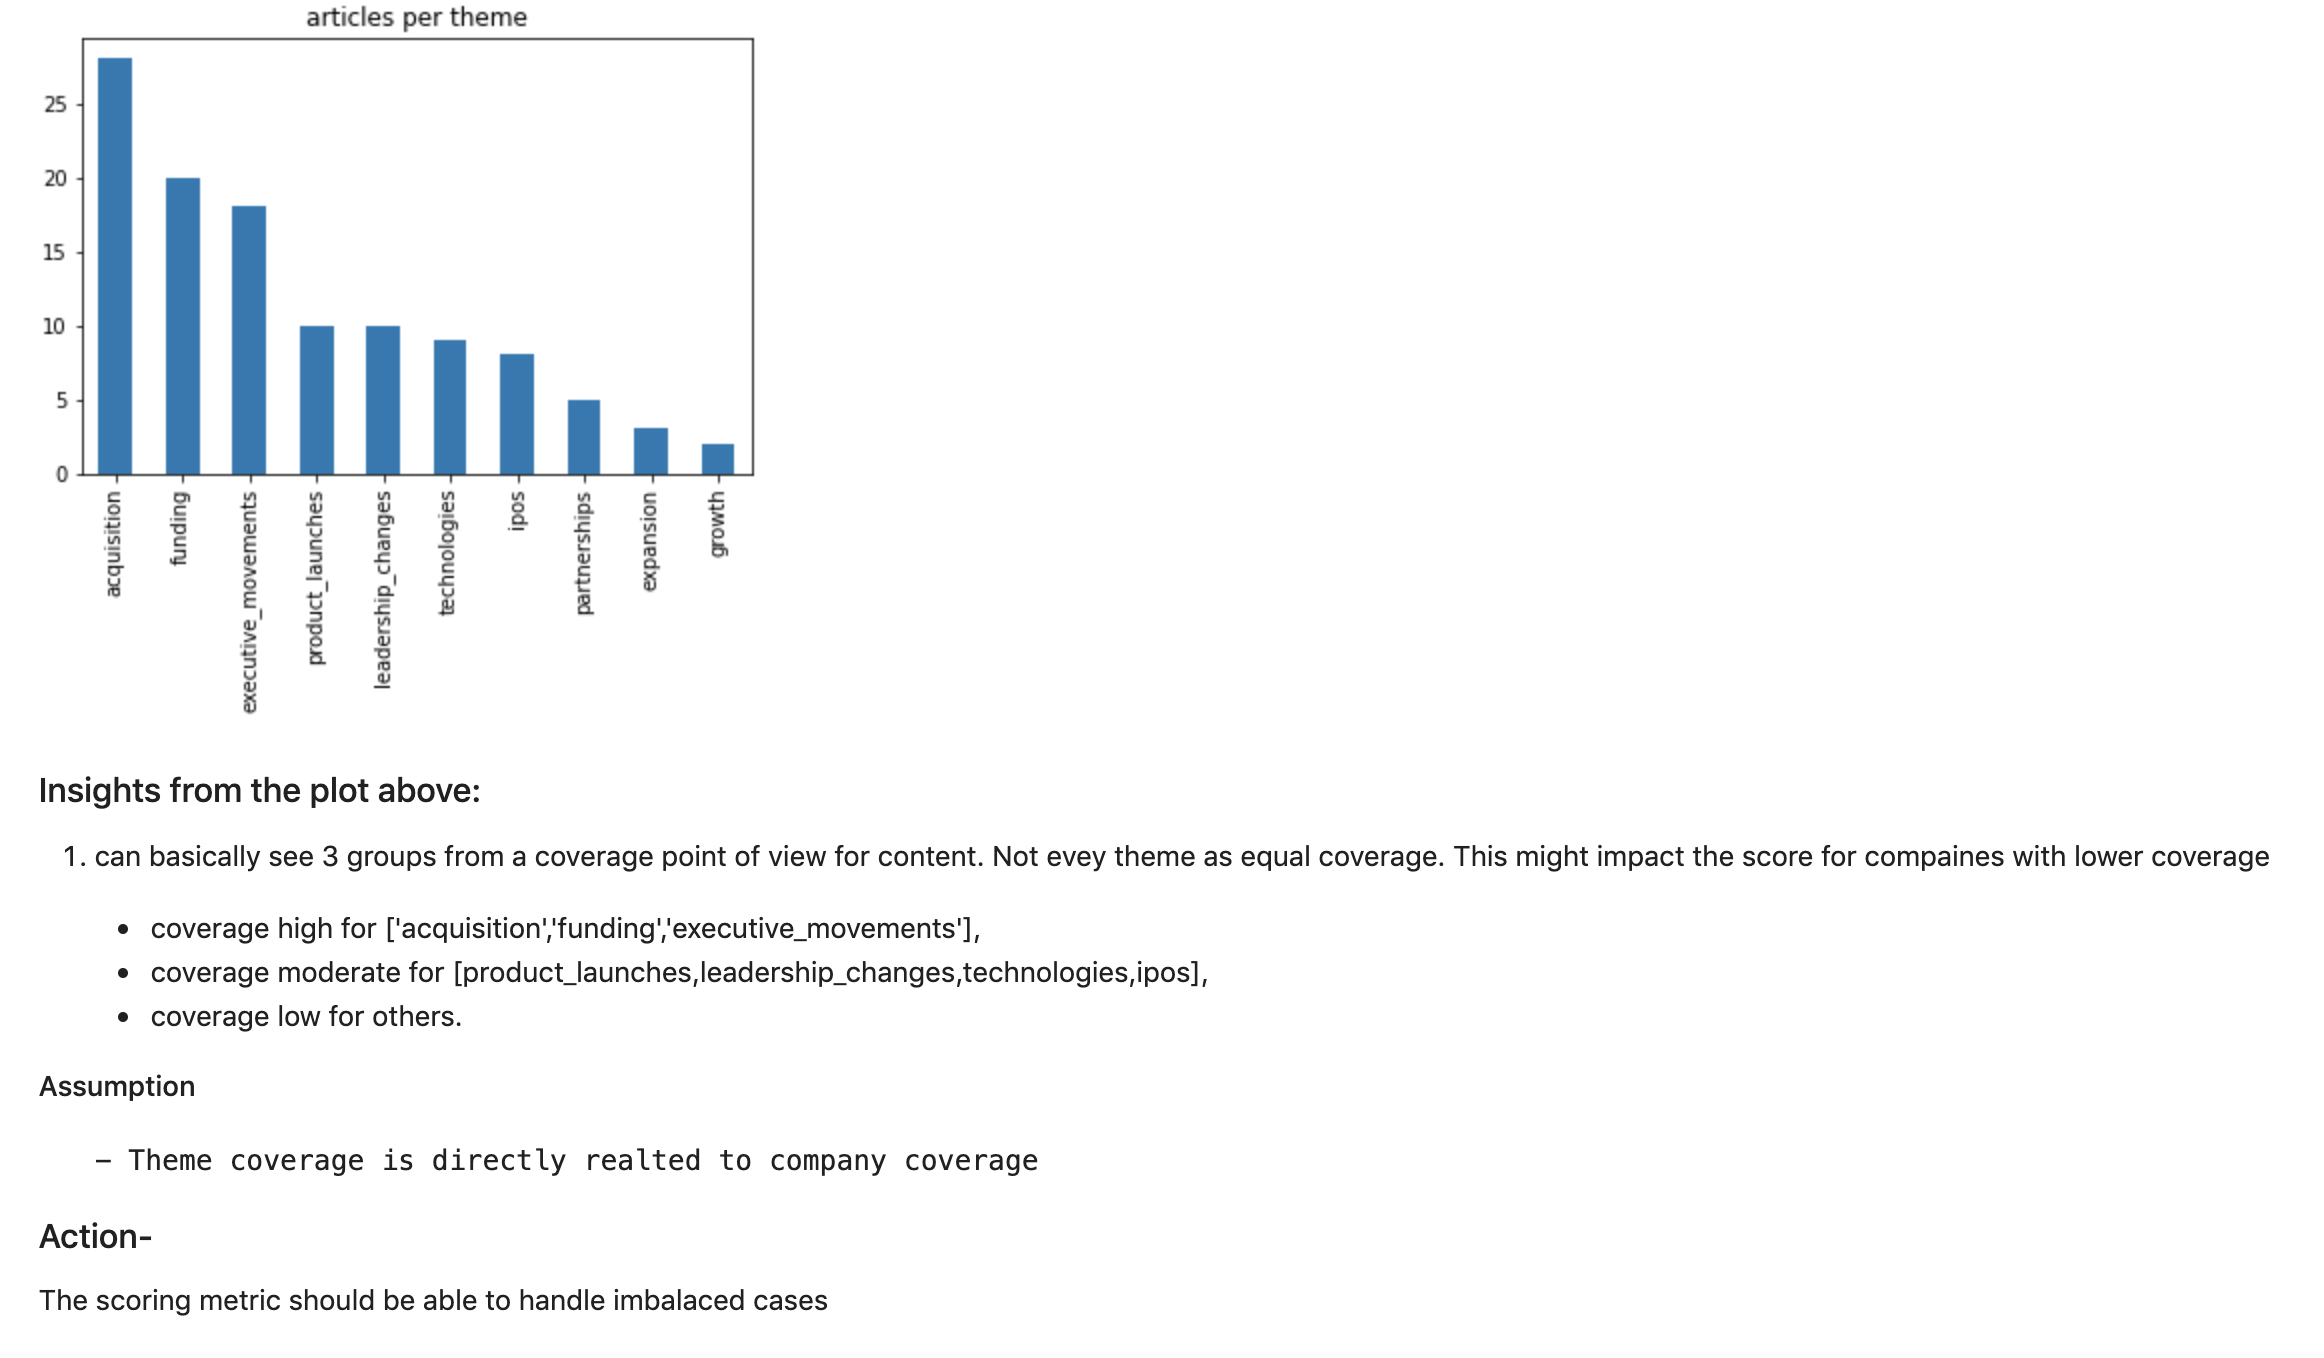

##### 2 Title and Description

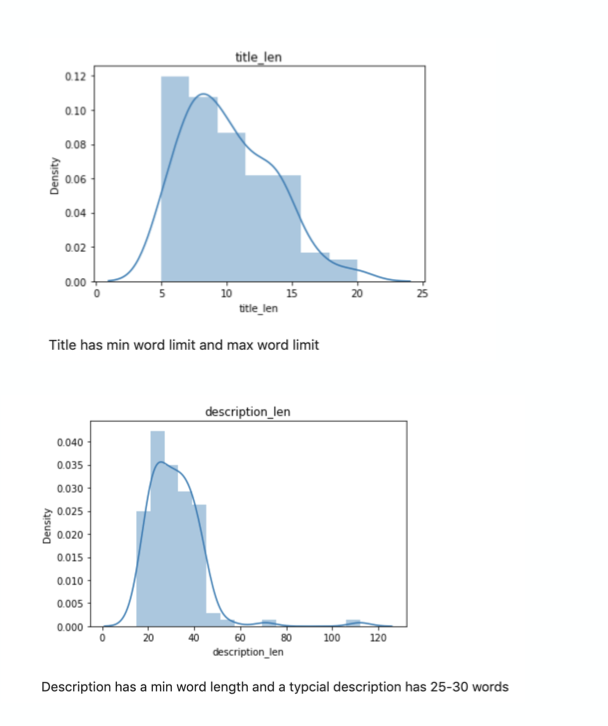

##### 3 Variation in Hour vs Theme

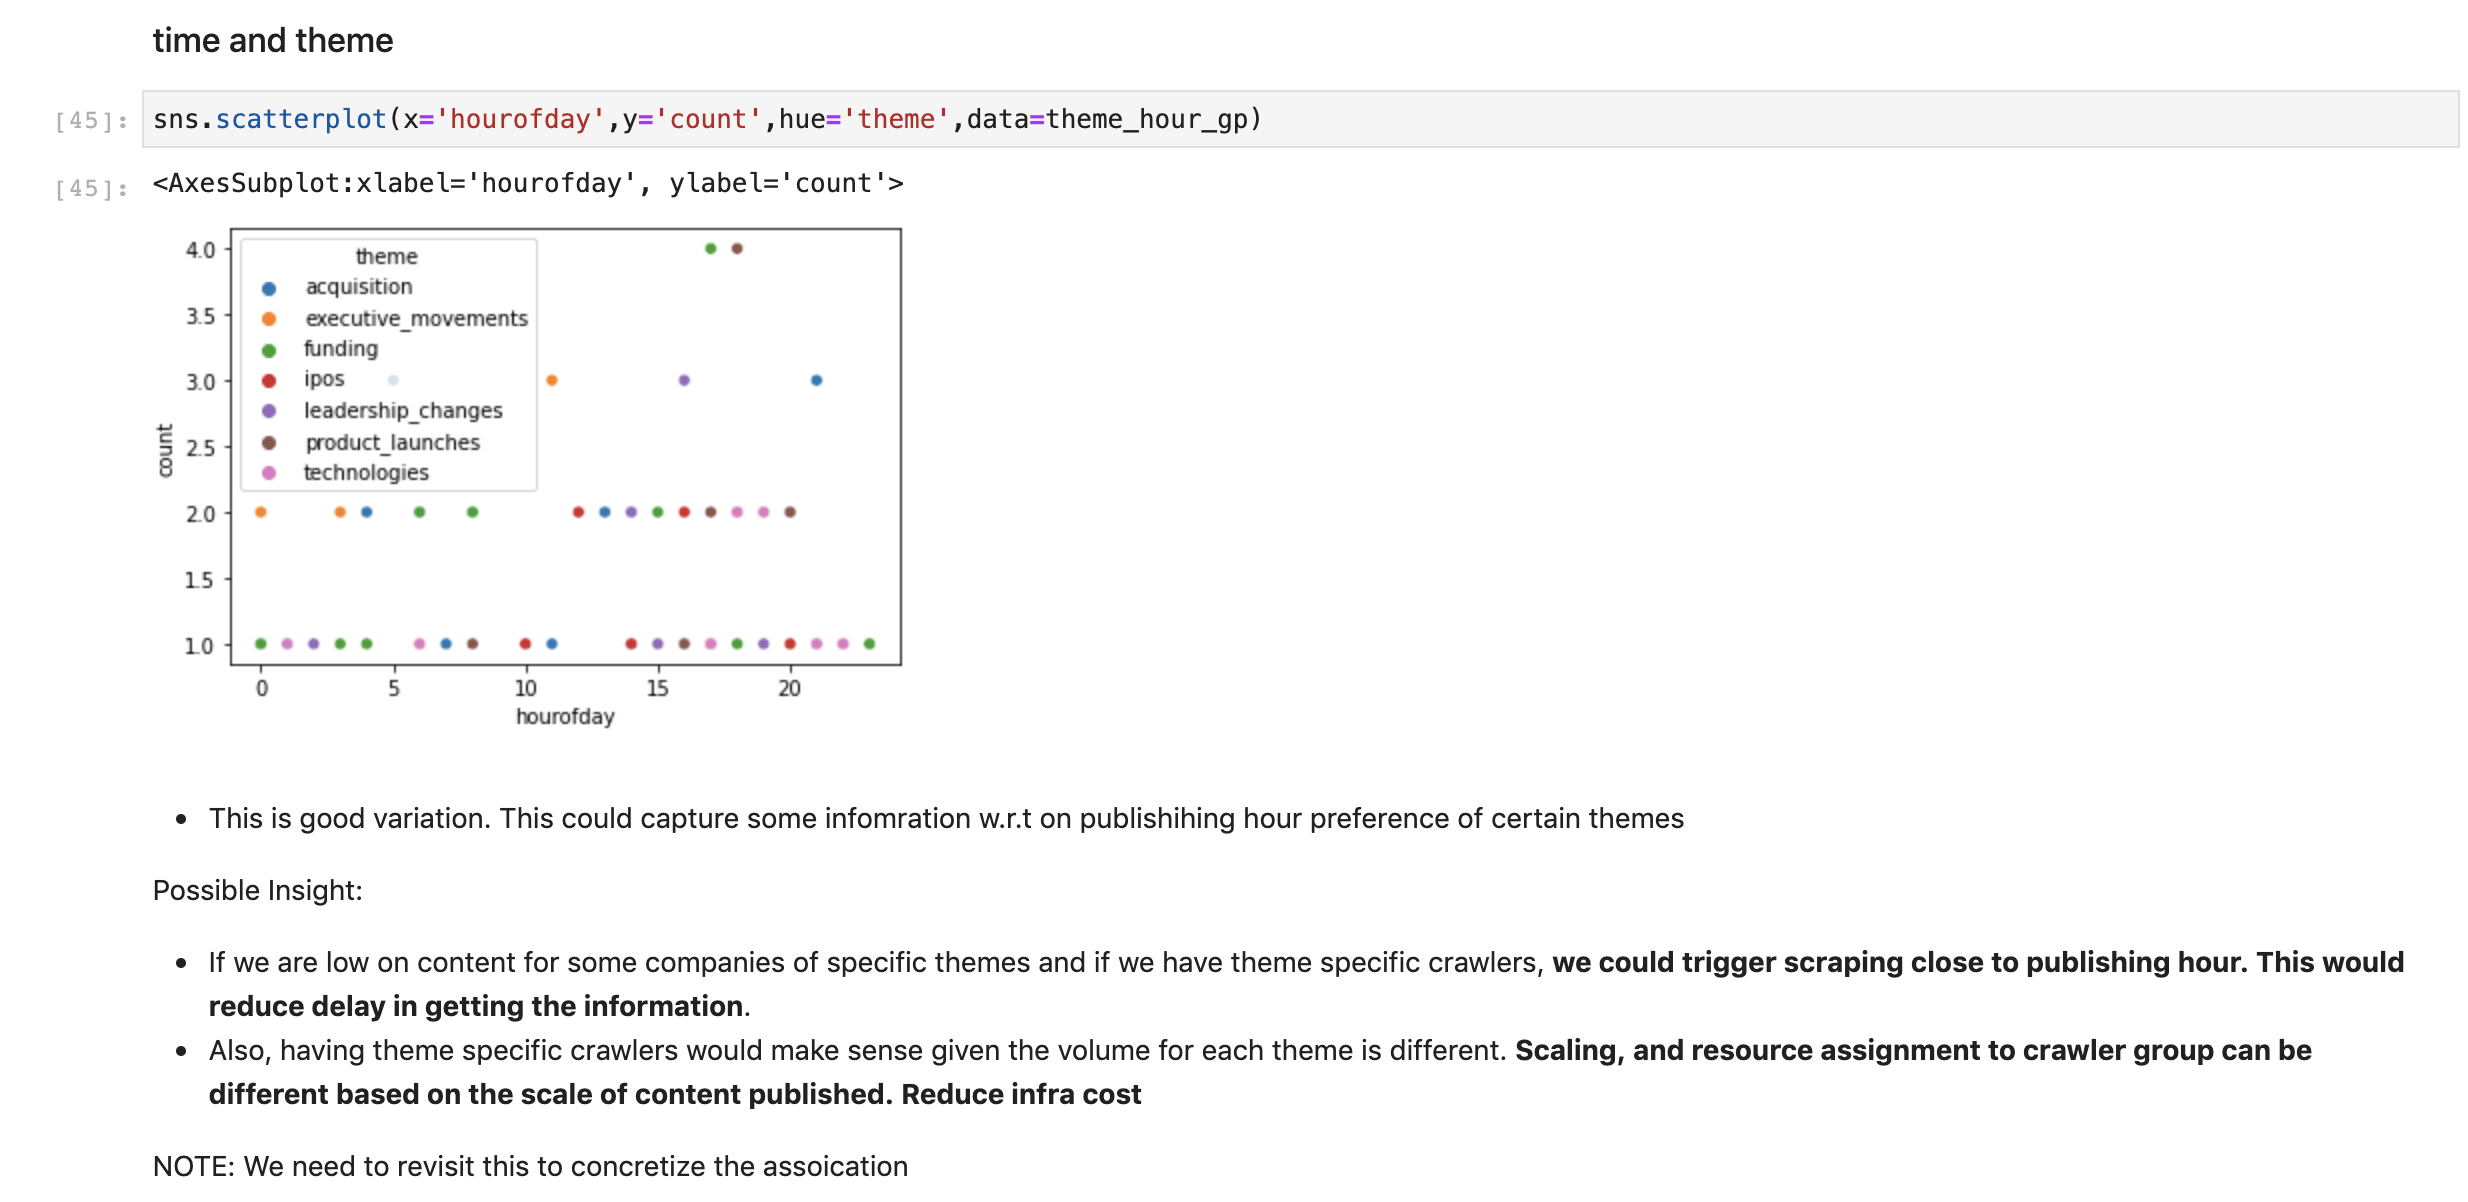

#### Implementation

The current implemmentation has a bare-bone structure

1. RHS - Content 
    - Pre-processing 
        - Basic cleanup
            - Punctuation removal
            - Lower
            - Tokenisation
    - Extraction
        - Model (NER using Spacy)
        
2. LHS - Company Names
    - Pre-processing
        - Tokenisation
3. Match -
    - Comparator 
        - Fuzzy search
    - Score
        - F1 - Score to capture the performance of the flow so far.


#### Problem specifc Customisations

1. Do not remove `&` and `.`. Company names have those characters as valid Symbols
2. We did not have ground truth with us. And we could not measure the performance. You cannot improve something you cannot measure.
    - Hand tagged a sample of the dataset with the actual company names. - `marked_data_vn.csv`
    - Created a measure for scoring the outcome.
3. Used a fuzzy search to have a better/faster improvment as opposed to spending time on pre-processing data a lot.(This was done given the time constraint.) 


#### Perfomance of Current Submission

The current outcome of the flow stands at F1 - Score of **0.39** which is not great to be honest

The value here is that now we can iterate and incrementally improve our output by selectively implementing strategies that we did not execute before.

#### Appendix

* 01_e2e.py - has the entire flow as a single run
* Files with `eda` in fileanme are the eda files
* The files are named appropriately to capture the essese of what they might be resposible for.

## LAST CELL